In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
RES_PATH = "../data/res.csv"
res = pd.read_csv(RES_PATH)
res

,x0,y0,x1,y1,collagen (px^2),tissue (px^2),collagen vs tissue (%)
0,20480,0,22528,2048,602.0,3968,15.171371
1,22528,0,24576,2048,1561.0,7936,19.669859
2,12288,2048,14336,4096,0.0,4096,0.000000
3,14336,2048,16384,4096,143.0,4096,3.491211
4,18432,2048,20480,4096,6124.0,32768,18.688965
...,...,...,...,...,...,...,...
204,20480,30720,22528,32768,28741.0,2392064,1.201515
205,22528,30720,24576,32768,24032.0,1421312,1.690832
206,24576,30720,26624,32768,5874.0,516096,1.138160
207,26624,30720,28672,32768,5743.0,20480,28.041992


In [4]:
TILE_SZ = 2048

In [12]:
density_map = np.zeros((int(np.ceil(res.x1.max()/TILE_SZ)),int(np.ceil(res.y1.max()/TILE_SZ))))

In [20]:
for _, row in res.iterrows():
    density_map[int(row.x0//TILE_SZ),int(row.y0//TILE_SZ)] = row["collagen vs tissue (%)"]

[]

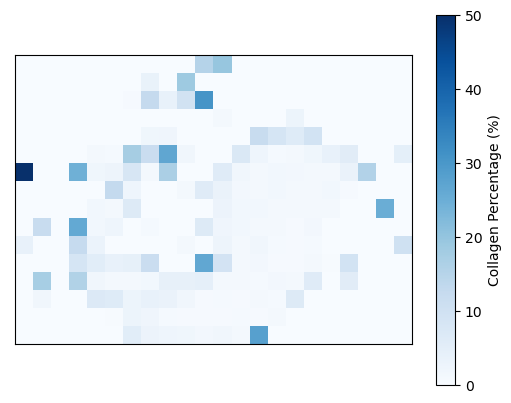

In [49]:
fig, ax = plt.subplots()
im = ax.imshow(density_map.T, cmap="Blues", vmin=0,vmax=50)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='w', linewidth=2,alpha=1)
ax.set_xticks(np.arange(-0.5, density_map.T.shape[1], 1))
ax.set_yticks(np.arange(-0.5, density_map.T.shape[0], 1))
cbar =  fig.colorbar(im, ax=ax)
cbar.set_label('Collagen Percentage (%)', rotation=90)
# ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])